In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [72]:
# let's try to see if we can make some predictions on the data
# first we need to load and prepare the data

file_path = 'final_temperature_data.csv'
df = pd.read_csv(file_path)


In [73]:
df.shape

(3213, 574)

In [74]:
df.head()

,county_name,state_id,Week 1 (2013),Week 2 (2013),Week 3 (2013),Week 4 (2013),Week 5 (2013),Week 6 (2013),Week 7 (2013),Week 8 (2013),...,Week 43 (2023),Week 44 (2023),Week 45 (2023),Week 46 (2023),Week 47 (2023),Week 48 (2023),Week 49 (2023),Week 50 (2023),Week 51 (2023),Week 52 (2023)
0,Autauga,1,280.562622,288.842010,281.019053,283.691543,283.189447,285.475239,280.999300,283.736256,...,294.078839,287.696695,290.966111,288.838550,286.076570,283.579595,285.241331,282.856063,281.682327,283.391150
1,Baldwin,1,283.186765,291.629847,284.186692,287.163466,286.215749,288.865460,283.877893,287.485569,...,295.744093,289.534702,292.889622,290.409739,288.324356,286.317106,287.898414,285.101813,283.980227,285.079174
2,Barbour,1,282.083567,290.148231,284.864902,284.801261,284.175462,286.447901,281.902147,285.091628,...,293.543676,288.331213,291.078570,288.507998,286.969247,284.081901,285.811202,283.234124,281.989423,284.485522
3,Bibb,1,279.695063,288.398234,279.948275,283.121328,282.845102,284.854205,280.734786,283.384290,...,294.395381,286.956202,290.978703,288.889425,285.766275,283.323501,285.065068,282.491950,281.380261,283.166546
4,Blount,1,278.090549,286.715763,278.540562,280.142595,280.622356,282.888349,279.140631,281.312564,...,293.009690,285.416365,289.856345,288.035294,284.697359,281.925097,283.807581,281.003791,279.913985,281.747241


In [75]:
date = 'Week 1 (2013)'
print(date.split()[1][1:5])



In [76]:
# let's reshape the dataframe to a long format
df_long = pd.melt(df, id_vars=['county_name', 'state_id'], var_name='date', value_name='temperature')
print(df_long.shape)
print(df_long.head())


(1837836, 4)
  county_name  state_id           date  temperature
0     Autauga         1  Week 1 (2013)   280.562622
1     Baldwin         1  Week 1 (2013)   283.186765
2     Barbour         1  Week 1 (2013)   282.083567
3        Bibb         1  Week 1 (2013)   279.695063
4      Blount         1  Week 1 (2013)   278.090549


In [77]:
df_long['week'] = df_long['date'].apply(lambda x: int(x.split()[1]))
df_long['year'] = df_long['date'].apply(lambda x: int(x.split('(')[1][:-1]))

In [78]:
df_long.head()

,county_name,state_id,date,temperature,week,year
0,Autauga,1,Week 1 (2013),280.562622,1,2013
1,Baldwin,1,Week 1 (2013),283.186765,1,2013
2,Barbour,1,Week 1 (2013),282.083567,1,2013
3,Bibb,1,Week 1 (2013),279.695063,1,2013
4,Blount,1,Week 1 (2013),278.090549,1,2013


In [79]:
# now we can remove the 'date' column
df_long = df_long.drop(columns='date')

In [80]:
# lets sort our new dataset
df_long = df_long.sort_values(by=['county_name', 'year', 'week'])

# now lets mage the lag features
df_long['lag_1'] = df_long.groupby('county_name')['temperature'].shift(1)
df_long['lag_2'] = df_long.groupby('county_name')['temperature'].shift(2)
df_long['lag_3'] = df_long.groupby('county_name')['temperature'].shift(3)


In [81]:
# now we can remove the rows with missing values
df_long = df_long.dropna()
df_long.head()

,county_name,state_id,temperature,week,year,lag_1,lag_2,lag_3
11952,Abbeville,45,277.611616,4,2013,284.349720,287.422190,280.636921
15165,Abbeville,45,281.129536,5,2013,277.611616,284.349720,287.422190
18378,Abbeville,45,282.106231,6,2013,281.129536,277.611616,284.349720
21591,Abbeville,45,279.879242,7,2013,282.106231,281.129536,277.611616
24804,Abbeville,45,279.873294,8,2013,279.879242,282.106231,281.129536


In [82]:
# now we can split the data into training and testing
train = df_long[df_long['year'] < 2022]
test = df_long[df_long['year'] >= 2022]

features = ['lag_1', 'lag_2', 'lag_3']
target = 'temperature'

X_train = train[features]
y_train = train[target]
x_test = test[features]
y_test = test[target]

In [83]:
# now we can build and train a simple model
from sklearn.linear_model import LinearRegression

# initialize the model
model = LinearRegression()

# train the model
model.fit(X_train, y_train)

LinearRegression()

In [84]:
# now we can make predictions
y_pred = model.predict(x_test)

In [85]:
# lets evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

MAE: 3.407770079535018
RMSE: 4.606243351737225


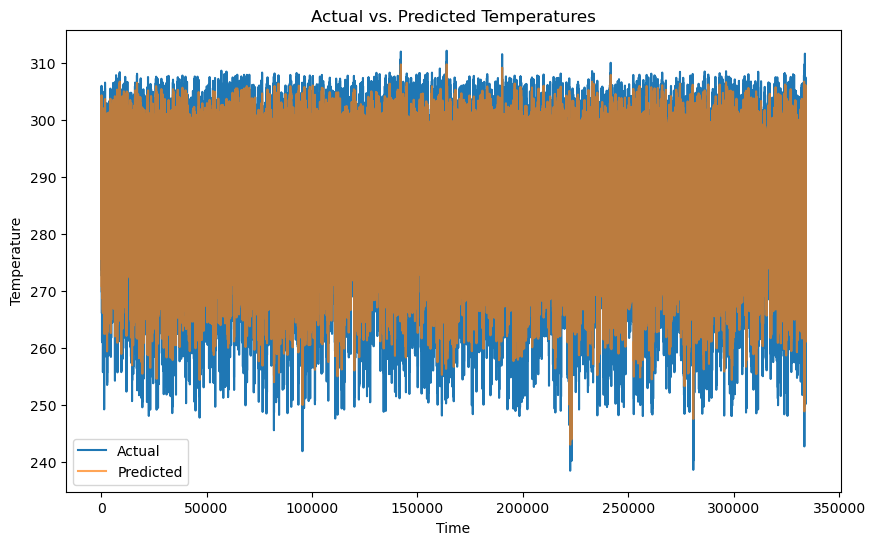

In [86]:
# Plot actual vs. predicted temperatures
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted', alpha=0.7)
plt.title('Actual vs. Predicted Temperatures')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

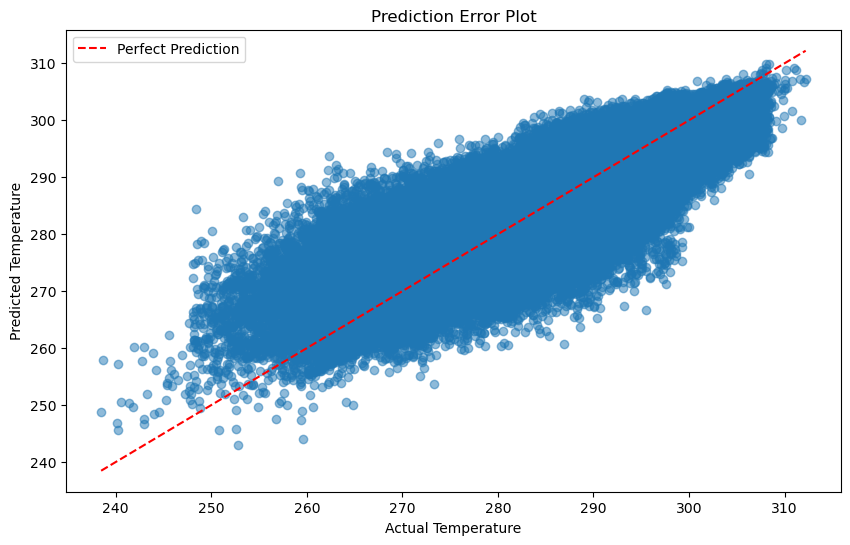

In [60]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Prediction Error Plot')
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.legend()
plt.show()
